In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import rawpy
import imageio
from PIL import Image
from glob import glob
import os


In [72]:
img1 = plt.imread('D:\OneDrive - IIT Delhi\Intern\BTP\Wei-Hao-20220605T090859Z-001\TIFF\TIFFDSC_4002.tiff')

In [75]:
img2 = plt.imread('D:\OneDrive - IIT Delhi\Intern\BTP\Wei-Hao-20220605T090859Z-001\TIFF\TIFFDSC_4003.tiff')

In [76]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [77]:
img1 = rgb2gray(img1)
img2 = rgb2gray(img2)

In [78]:
print(img1.shape)
print(img2.shape)

(4924, 7378)
(4924, 7378)


In [79]:
img1.max()

254.97449999999998

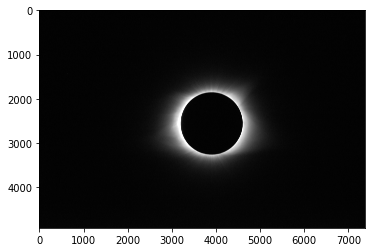

In [80]:
plt.imshow(img1, cmap = plt.get_cmap('gray'))

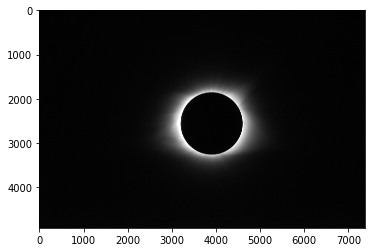

In [81]:
plt.imshow(img2, cmap = plt.get_cmap('gray'))

In [86]:
 corr = np.correlate(img1.flatten(), img2.flatten())

In [87]:
corr 

array([3.24378366e+10])

In [83]:
x = np.where(img2>200)

In [62]:
y = np.where(img1>200)

In [63]:
print(np.size(x[0]))
print(np.size(y[0]))

242131
239418


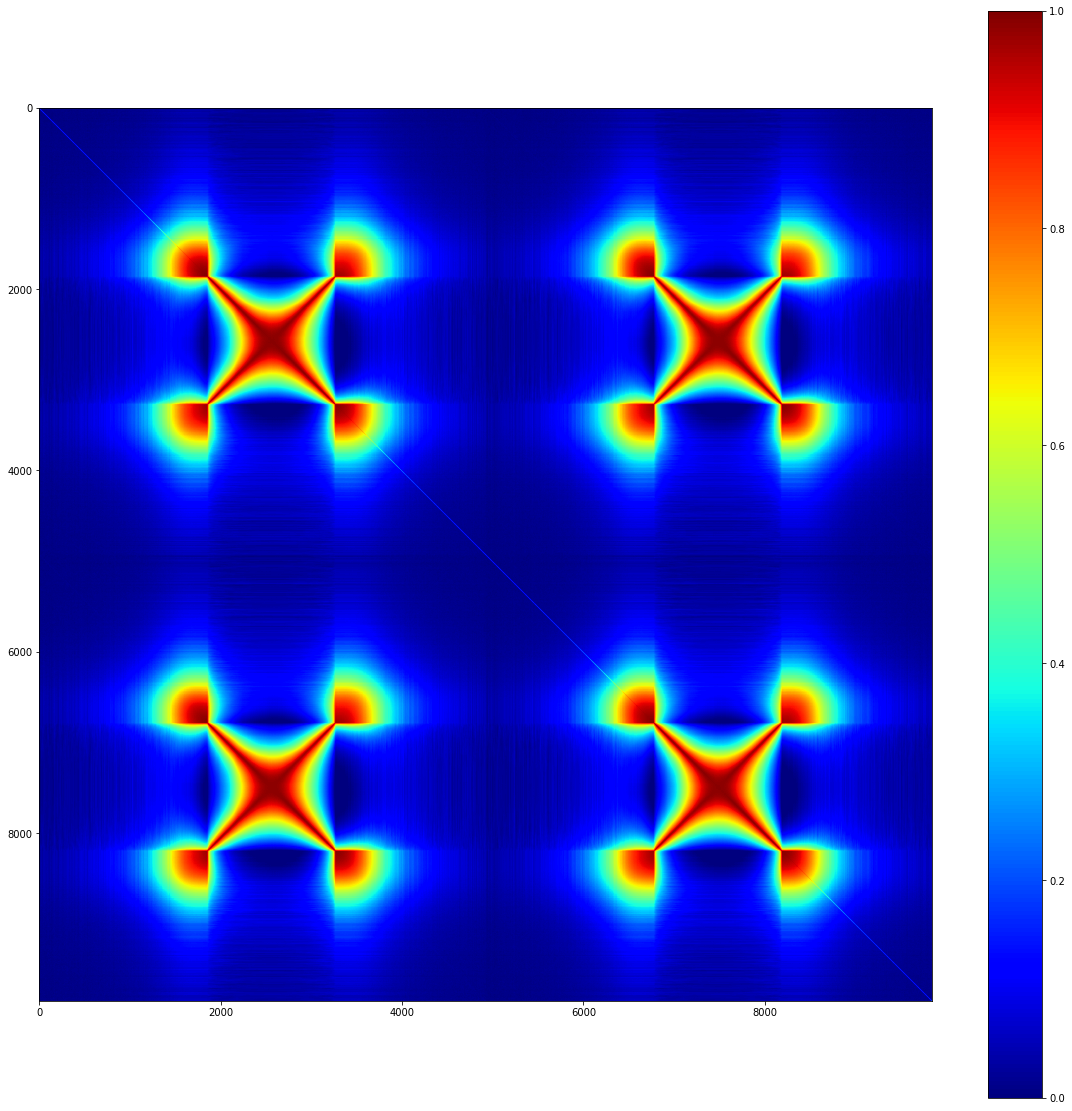

In [84]:
img_diff = img1 - img2
img_diff = img_diff*255/img_diff.max()
plt.figure(figsize=(20,20))
plt.imshow(corr[:,:], cmap='jet', vmin=0, vmax=1)
plt.colorbar()